In [35]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from keras.layers import Input, Dense
from keras.models import Sequential
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])


Counter({'N': 148, 'Y': 332})

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [38]:
pre_y=df['Loan_Status']
pre_x = df.drop('Loan_Status',axis=1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1,N=0))
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
6,0.0,2333,1516.0,95000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
7,3.0,3036,2504.0,158000,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0
8,2.0,4006,1526.0,168000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
9,1.0,12841,10968.0,349000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
10,2.0,3200,700.0,70000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [39]:
smote = SMOTE('minority')
X1,y = smote.fit_sample(dm_x,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X

array([[0.33333333, 0.05482993, 0.0445666 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03525046, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.03009276, 0.06968703, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.03262832, 0.04462766, ..., 0.        , 1.        ,
        0.        ],
       [0.98910585, 0.15281385, 0.09250841, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.03386518, 0.05261732, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [41]:
classifier = Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(10,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,Y_train,batch_size=20,epochs=50,verbose=0)
eval_model = classifier.evaluate(X_train,Y_train)
eval_model


531/531 [==============================] - 0s 252us/step


[0.3171985872552893, 0.8644067804467656]

In [42]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.55)

In [43]:
type(X_test)

numpy.ndarray

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

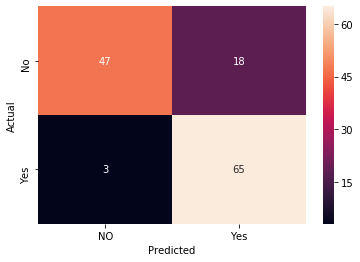

In [44]:
cn = confusion_matrix(Y_test,Y_pred)
ax = plt.subplot()
sns.heatmap(cn,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['NO','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])


In [45]:
import pickle
from sklearn.externals import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier,filename)

['loan_model.pkl']

In [46]:
Y_pred

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [48]:
import pickle 
from sklearn.externals import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
from collections import Counter

In [56]:
values =X_test
def loanstatus(values):
    model = joblib.load('loan_model.pkl')
    arr=values
    prediction = model.predict(arr)
    val=prediction
    dic={0:'Rejected',1:'approved'}
    
    return val
loanstatus(values)

array([[8.6863405e-01],
       [3.4064651e-03],
       [7.0706987e-01],
       [8.3649075e-01],
       [9.4211757e-01],
       [8.5363626e-01],
       [5.9604645e-08],
       [7.0114022e-01],
       [3.6835670e-05],
       [8.0679381e-01],
       [9.3068957e-01],
       [8.6390758e-01],
       [5.6420296e-02],
       [9.3049526e-01],
       [9.2093480e-01],
       [3.4935325e-02],
       [7.4644250e-01],
       [1.3261735e-03],
       [8.0146372e-01],
       [9.0984577e-01],
       [8.5696393e-01],
       [9.2600101e-01],
       [8.0913126e-01],
       [8.6001432e-01],
       [1.7881393e-07],
       [9.2485547e-01],
       [3.2782555e-07],
       [6.9126219e-02],
       [9.3324685e-01],
       [9.4244027e-01],
       [7.3173642e-04],
       [5.0663948e-07],
       [3.4570694e-06],
       [8.3693421e-01],
       [8.5555124e-01],
       [7.9607469e-01],
       [8.9247990e-01],
       [1.3005733e-04],
       [8.4732842e-01],
       [3.5166740e-05],
       [1.4305115e-06],
       [7.113673